In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import joblib
!pip install matplotlib --upgrade
%matplotlib inline

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading DataSet into Pandas DataFrame
data= pd.read_csv('/content/drive/MyDrive/files/hello_dataSet.csv')

In [4]:
#Cleaning Data(Normalize)
data['Name']= data['Name'].str.upper()
data['Gender']= data['Gender'].str.lower()
data['FavoriteColor']= data['FavoriteColor'].str.lower()
data['BirthMonth']= data['BirthMonth'].str.lower()

In [5]:
#Cleaning Data(Initializing REGEX)
r_part = r'^(\d{3})'
r_cgpa = r'^([0-9]*\.*[0-9]*)$'
r_color = r'^([a-z]*)'
r_month =r'^([a-z]*)'
r_weight=r'^(\d+\.*\d*)'

In [6]:
#Cleaning Data(Clean)
data['BirthMonth']=data['BirthMonth'].replace('feburary','february')
data['BirthMonth']=data['BirthMonth'].replace('sep','september')

In [7]:
#Cleaning Data(Clean)
part1 = data['HSSC-1'].str.extract(r_part, expand=False)
part2 = data['HSSC-2'].str.extract(r_part, expand=False)
cgpa = data['CGPA'].str.extract(r_cgpa, expand=False)
color = data['FavoriteColor'].str.extract(r_color, expand=False)
month = data['BirthMonth'].str.extract(r_month, expand=False)
weight = data['Weight'].str.extract(r_weight, expand=False)

In [8]:
#Cleaning Data(Clean)
data['HSSC-1'] = pd.to_numeric(part1)
data['HSSC-2'] = pd.to_numeric(part2)
data['CGPA'] = pd.to_numeric(cgpa)
data['FavoriteColor']= color
data['BirthMonth']= month
data['Weight'] = pd.to_numeric(weight)

In [9]:
#Cleaning Data(Clean)
data['BirthMonth']=data['BirthMonth'].replace('',value=data['BirthMonth'].mode()[0])

In [10]:
#Cleaning Data(Replacing NULL)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newData_numerics = data.select_dtypes(include=numerics)
for x in newData_numerics:
    data[x].replace([np.nan],data[x].mode()[0],inplace=True)

In [11]:
#Cleaning Data()
data['HSSC-1'] = data['HSSC-1'].apply(np.int64)

In [12]:
#Saving Cleaned Dataset
data.to_csv('/content/drive/MyDrive/files/cleanedHelloWorldData.csv')

In [13]:
# Print the list of all students whose first name starts with letter the 'H'.
r_1 = r'^(H+[A-Z]*\s*[A-Z]*\s*[A-Z]*\s*[A-Z]*)'
stu1 = data['Name'].str.extract(r_1,expand=False)
stu1.isnull().values
list_1 = [x for x in stu1 if str(x) != 'nan']
list_1

['HAMZA NAVEED',
 'HABIB ULLAH',
 'HUNAIN JAVED',
 'HAFIZ MALAHIM LABIB',
 'HAMNA TARIQ SALEEMI',
 'HINA',
 'HAMZA JAVED KHAN',
 'HUSNAIN AHMED ',
 'HAMAYOUN MASROOR',
 'HUSSAIN AFZAL']

In [14]:
# Print the total number of students who have a three words name (first-middle-surname).
r_2 = r'^(H+[A-Z]+\s+[A-Z]+\s+[A-Z]+)'
stu2 = data['Name'].str.extract(r_2,expand=False)
stu2.isnull().values
list_2 = [x for x in stu2 if str(x) != 'nan']
len(list_2)

3

In [15]:
# Print the percentage of students who have a CGPA of 3.0 or above.
arr=[]
data['CGPA'].values
for x in data['CGPA']:
  if x>= 3.0:
    arr.append(x)
result = (len(arr)/len(data['CGPA'])*100)
print("Percentage of students having more than 3 CGPA=",result,"%")

Percentage of students having more than 3 CGPA= 28.35820895522388 %


In [142]:
plt.style.use('seaborn')

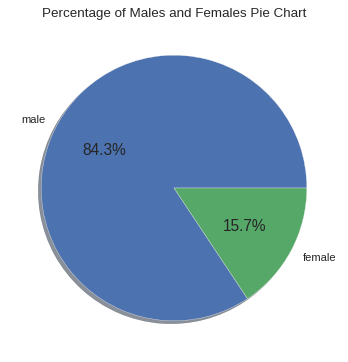

In [143]:
# Plot a pie chart to show the ratio of male and female students
male= [x for x in data['Gender'] if str(x)== 'male']
female= [x for x in data['Gender'] if str(x)=='female']
d=[len(male),len(female)]
labels = ['male','female']

fig, ax1 = plt.subplots(figsize = (5,5))
ax1.pie(d, labels= labels,autopct='%1.1f%%',shadow = True)
plt.title('Percentage of Males and Females Pie Chart')
plt.savefig('/content/drive/MyDrive/files/graphs_hello/pie.png', dpi=80)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

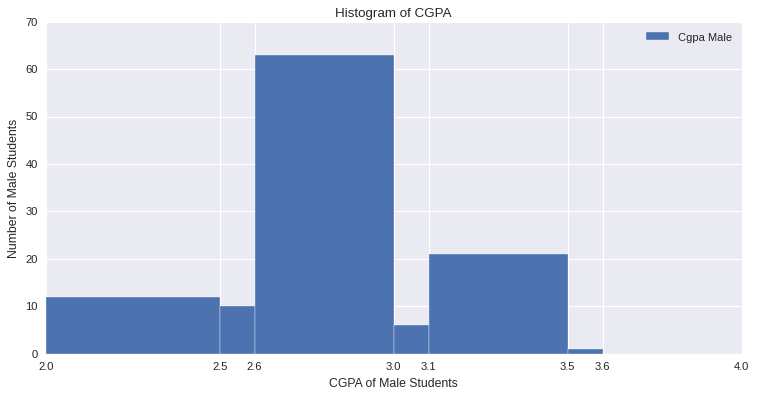

In [144]:
# Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.
arr =[]
i=0
for x in data['Gender']:
  if x == 'male':
    arr.append(data['CGPA'][i])
  i+=1

bin=[2.0,2.5,2.6,3.0,3.1,3.5,3.6,4.0]
plt.figure(figsize=(10,5),dpi=80)
plt.hist(arr,bins=bin,edgecolor='w')
plt.xticks(bin)
plt.xlabel("CGPA of Male Students")
plt.ylabel("Number of Male Students")
plt.title("Histogram of CGPA")
plt.legend(labels=['Cgpa Male'])
plt.savefig('/content/drive/MyDrive/files/graphs_hello/histogram.png', dpi=80, bbox_inches='tight')
plt.show

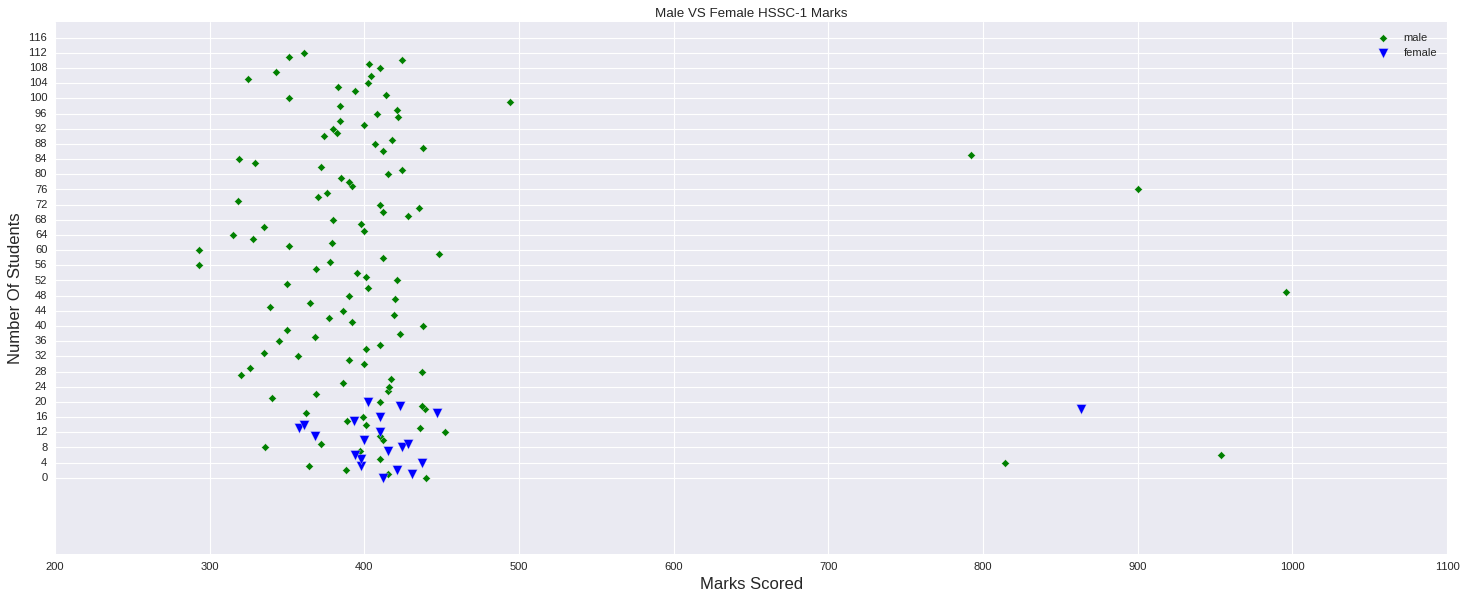

In [145]:
# Plot the HSSC-1 marks of all male vs female students on a scatter plot.
male_grades=[]
female_grades=[]
i=0
for x in data['Gender']:
  if x == 'male':
    male_grades.append(data['HSSC-1'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_grades.append(data['HSSC-1'][j])
  j+=1

r_m= range(0,int(len(male_grades)))
r_f= range(0,int(len(female_grades)))
res_range= range(0,int(len(male_grades))+4,4)

fig, ax1 = plt.subplots(figsize = (20,8))
ax1.scatter(male_grades, r_m, marker='D',s=25,c='g')
ax1.scatter(female_grades, r_f, marker='v',s=80,c='b')
plt.yticks(res_range)

plt.xlabel('Marks Scored', fontsize=15)
plt.ylabel('Number Of Students', fontsize=15)
plt.title('Male VS Female HSSC-1 Marks')
plt.legend(["male","female"], loc = "best")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/scatter.png', dpi=60, bbox_inches='tight')
plt.show()

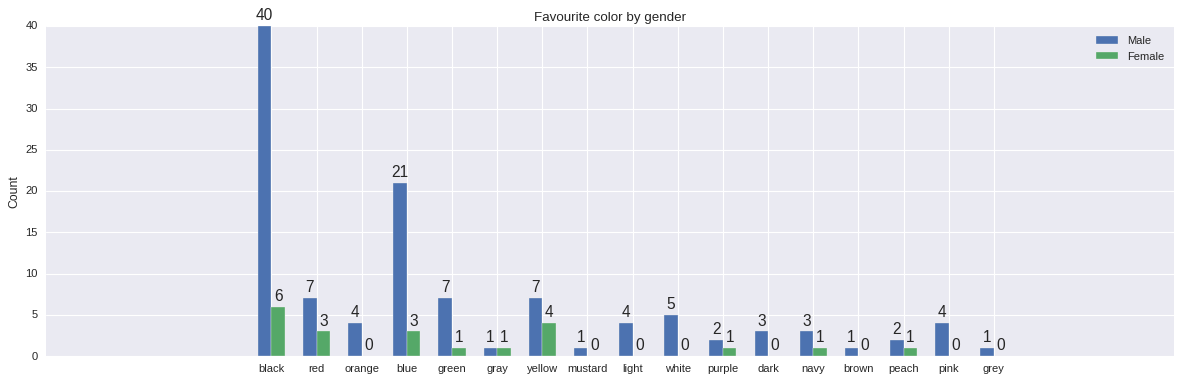

In [146]:
# Plot the favorite colors of male vs female students on a bar chart.
male_color=[]
female_color=[]
i=0
for x in data['Gender']:
  if x == 'male':
    male_color.append(data['FavoriteColor'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_color.append(data['FavoriteColor'][j])
  j+=1

occurrence1 = {item: male_color.count(item) for item in male_color}
ar1=[]
for item in occurrence1:
  ar1.append(occurrence1.get(item))
occurrence2 = {item: female_color.count(item) for item in male_color}
ar2=[]
for item in occurrence2:
  ar2.append(occurrence2.get(item))

lab= male_color+female_color
lab= list(dict.fromkeys(lab))

x = np.arange(len(lab))
width = 0.3
fig, ax = plt.subplots(figsize=(15,5))
rects1 =ax.bar(x - width/2, ar1, width, label='Male')
rects2 =ax.bar(x + width/2, ar2, width, label='Female')
ax.set_ylabel('Count')
ax.set_title('Favourite color by gender')
ax.set_xticks(x,lab)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/files/graphs_hello/bar.png', dpi=80, bbox_inches='tight')
plt.show()

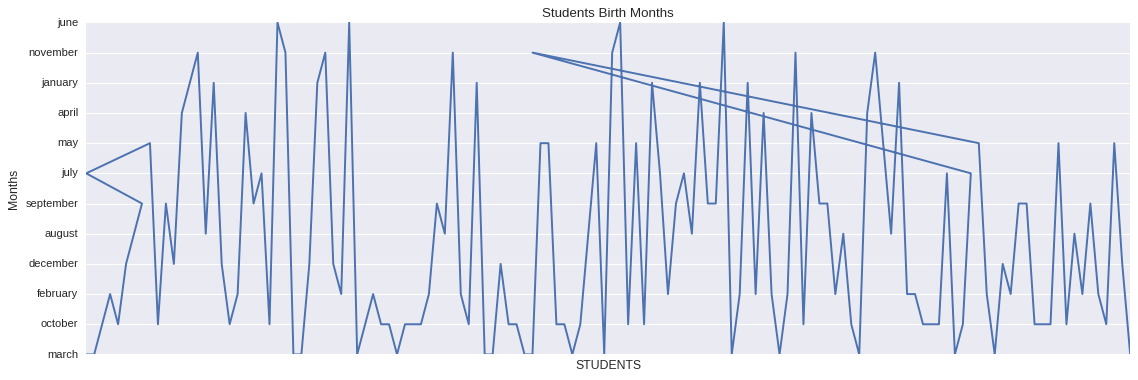

In [147]:
# Plot line chart of students and their birth months.
stu_names=list(data['Name'])
mon_names=list(data['BirthMonth'])

from calendar import month_name
month_lookup = list(month_name)
month_lookup=[x.lower() for x in month_lookup]
mon_sorted= sorted(mon_names, key=month_lookup.index)
mon_sorted = list(dict.fromkeys(mon_sorted))

plt.figure(figsize=(15,5),dpi=80)
plt.plot(stu_names,mon_names)
plt.yticks(mon_sorted)
plt.xticks('')
plt.ylabel("Months")
plt.xlabel("STUDENTS")
plt.title("Students Birth Months")
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/files/graphs_hello/line.png', dpi=80, bbox_inches='tight')
plt.show()

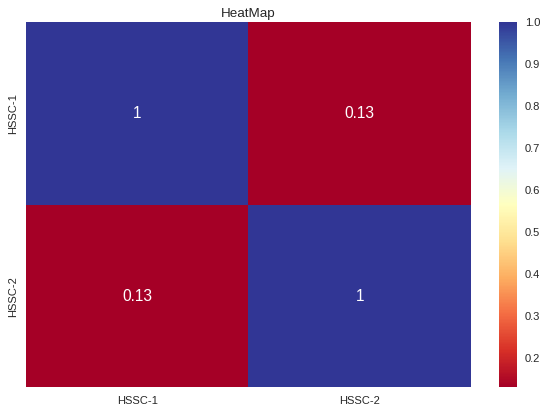

In [148]:
# Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.
data['HSSC-1'].corr(data['HSSC-2'])
data['HSSC-1'].values

data2 = data.filter(['HSSC-1','HSSC-2'], axis=1)
data2.corr()

dataplot = sns.heatmap(data2.corr(), cmap="RdYlBu", annot=True)
plt.title("HeatMap")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/heat.png', dpi=80, bbox_inches='tight')
plt.show()

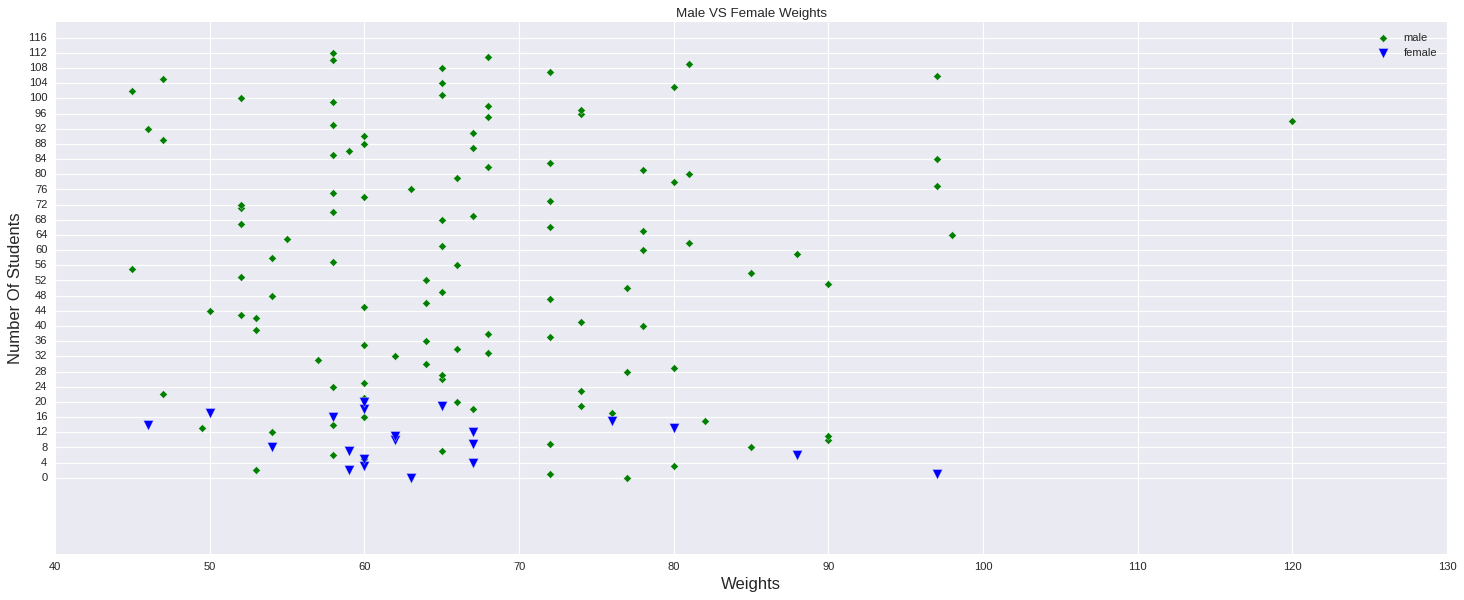

In [149]:
# What other things (insights) you can get from the dataset?
# 1. Male vs Females weight with scatter plot
male_w=[]
female_w=[]

i=0
for x in data['Gender']:
  if x == 'male':
    male_w.append(data['Weight'][i])
  i+=1

j=0
for y in data['Gender']:
  if y == 'female':
    female_w.append(data['Weight'][j])
  j+=1

r_m= range(0,int(len(male_w)))
r_f= range(0,int(len(female_w)))
res_range= range(0,int(len(male_w))+4,4)

fig, ax1 = plt.subplots(figsize = (20,8))
ax1.scatter(male_w, r_m, marker='D',s=25,c='g')
ax1.scatter(female_w, r_f, marker='v',s=80,c='b')
plt.yticks(res_range)

plt.xlabel('Weights', fontsize=15)
plt.ylabel('Number Of Students', fontsize=15)
plt.title('Male VS Female Weights')
plt.legend(["male","female"], loc = "best")
plt.savefig('/content/drive/MyDrive/files/graphs_hello/scatter_weight.png', dpi=60, bbox_inches='tight')
plt.show()